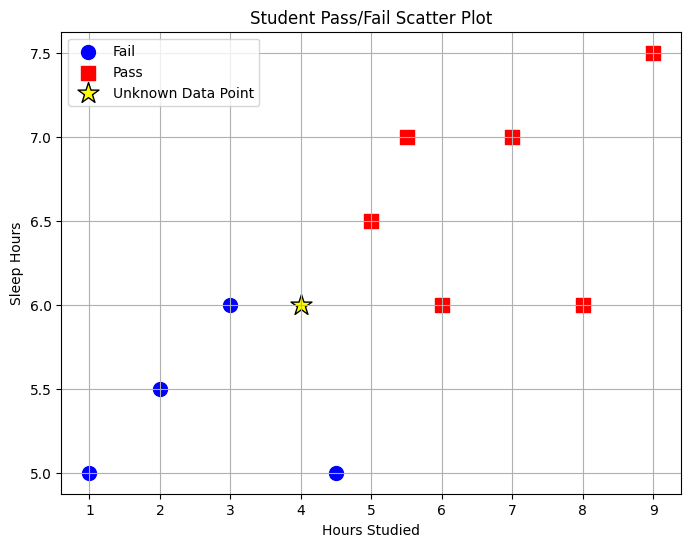

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define Training Data
# ----------------------------
data = {
    "Student": list(range(1,11)),
    "Hours_Studied": [1.0,2.0,3.0,4.5,5.0,5.5,6.0,7.0,8.0,9.0],
    "Sleep_Hours": [5.0,5.5,6.0,5.0,6.5,7.0,6.0,7.0,6.0,7.5],
    "PassFail": [0,0,0,0,1,1,1,1,1,1]
}
df = pd.DataFrame(data)

# Unknown data point
unknown_point = {"Hours_Studied": 4.0, "Sleep_Hours": 6.0}

# ----------------------------
# Step 1: Scatter Plot
# ----------------------------
plt.figure(figsize=(8,6))
for idx, row in df.iterrows():
    if row.PassFail == 0:
        plt.scatter(row.Hours_Studied, row.Sleep_Hours, c='blue', marker='o', s=100, label='Fail' if idx==0 else "")
    else:
        plt.scatter(row.Hours_Studied, row.Sleep_Hours, c='red', marker='s', s=100, label='Pass' if idx==4 else "")

# Unknown data point as yellow star with black outline
plt.scatter(unknown_point["Hours_Studied"], unknown_point["Sleep_Hours"],
            c='yellow', edgecolors='black', marker='*', s=250, label='Unknown Data Point')

plt.title("Student Pass/Fail Scatter Plot")
plt.xlabel("Hours Studied")
plt.ylabel("Sleep Hours")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ----------------------------
# Step 2: Compute Euclidean Distances (Clean Table)
# ----------------------------
df["Euclidean_Distance"] = np.sqrt(
    (df["Hours_Studied"] - unknown_point["Hours_Studied"])**2 +
    (df["Sleep_Hours"] - unknown_point["Sleep_Hours"])**2
)

# Set 'Student' as index for clean display and style table
df_clean = df.set_index("Student")

# Display with bigger font in Colab
from IPython.display import display, HTML
display(df_clean.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14pt')]},
     {'selector': 'td', 'props': [('font-size', '12pt')]}]
))

,Hours_Studied,Sleep_Hours,PassFail,Euclidean_Distance
Student,,,,
1,1.000000,5.000000,0,3.162278
2,2.000000,5.500000,0,2.061553
3,3.000000,6.000000,0,1.000000
4,4.500000,5.000000,0,1.118034
5,5.000000,6.500000,1,1.118034
6,5.500000,7.000000,1,1.802776
7,6.000000,6.000000,1,2.000000
8,7.000000,7.000000,1,3.162278
9,8.000000,6.000000,1,4.000000


In [ ]:
# ----------------------------
# Step 3: Find the 3 Nearest Neighbors (Clean Table)
# ----------------------------
k = 3
nearest_neighbors = df.nsmallest(k, "Euclidean_Distance")

# Set 'Student' as index for clean display
nearest_neighbors_clean = nearest_neighbors.set_index("Student")

print(f"=== Step 3: {k} Nearest Neighbors ===")
from IPython.display import display, HTML
display(nearest_neighbors_clean.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14pt')]},
     {'selector': 'td', 'props': [('font-size', '12pt')]}]
))


=== Step 3: 3 Nearest Neighbors ===


,Hours_Studied,Sleep_Hours,PassFail,Euclidean_Distance
Student,,,,
3,3.000000,6.000000,0,1.000000
4,4.500000,5.000000,0,1.118034
5,5.000000,6.500000,1,1.118034


In [ ]:
pass_count = nearest_neighbors["PassFail"].sum()
fail_count = k - pass_count
prediction = 1 if pass_count > fail_count else 0

print("=== Step 4: Majority Vote ===")
print(f"Pass (1) count: {pass_count}")
print(f"Fail (0) count: {fail_count}")
print(f"Prediction for the unknown data point: {'Pass' if prediction==1 else 'Fail'}")


=== Step 4: Majority Vote ===
Pass (1) count: 1
Fail (0) count: 2
Prediction for the unknown data point: Fail


In [ ]:
print("=== Step 5: Discussion Questions ===")
print("1. Final prediction: ", "Fail" if prediction==0 else "Pass")

# Example: k=5 prediction
k5_neighbors = df.nsmallest(5, "Euclidean_Distance")
pass_count_k5 = k5_neighbors["PassFail"].sum()
fail_count_k5 = 5 - pass_count_k5
prediction_k5 = 1 if pass_count_k5 > fail_count_k5 else 0
print("2. Prediction if k=5: ", "Pass" if prediction_k5==1 else "Fail")

=== Step 5: Discussion Questions ===
1. Final prediction:  Fail
2. Prediction if k=5:  Pass
